Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

age — возраст    
sex — пол (1 - мужчина, 0 - женщина)    
cp — тип боли в груди (4 значения)    
trestbps — артериальное давление в покое    
chol — холестерин сыворотки в мг/дл    
fbs — уровень сахара в крови натощак > 120 мг/дл    
restecg — результаты электрокардиографии в покое (значения 0,1,2)    
thalach — достигнута максимальная частота сердечных сокращений    
exang — стенокардия, вызванная физической нагрузкой     
oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя     
slope — наклон пикового сегмента ST при нагрузке     
ca — количество крупных сосудов (0-3), окрашенных при флюроскопии     
thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект     

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import statistics
from sklearn.metrics import matthews_corrcoef
from sklearn import preprocessing

In [263]:
heart = pd.read_csv('D:\Data Science\IDE\Skillfactory\EDA\data\heart.csv')

Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.
В ответ введите результат выполнения кода heart['old'].sum().

In [264]:
heart['old'] = data['age'].apply(lambda x: 1 if x > 60 else 0)
heart['old'].sum()

79

Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.

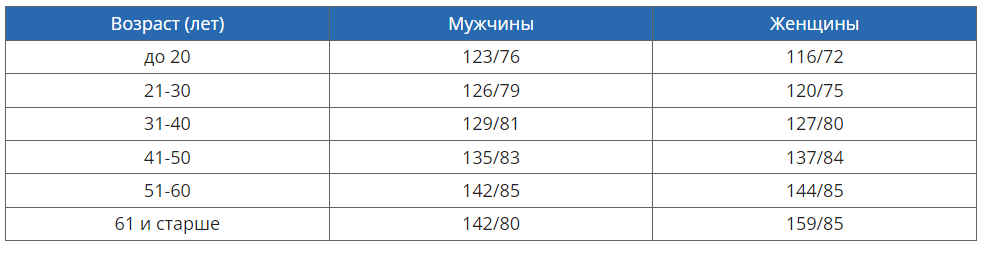
В ответ напишите значение признака trestbps_mean для пациента под номером 300.

In [265]:
def trestbps_mean(x, y):
    if x <= 20 and y == 1:
        return 123
    elif 20 < x <= 30 and y == 1:
        return 126
    elif 30 < x <= 40 and y == 1:
        return 129
    elif 40 < x <= 50 and y == 1:
        return 135
    elif 50 < x <= 60 and y == 1:
        return 142
    elif x > 60 and y == 1:
        return 142
    elif x <= 20 and y == 0:
        return 116
    elif 20 < x <= 30 and y == 0:
        return 120
    elif 30 < x <= 40 and y == 0:
        return 127
    elif 40 < x <= 50 and y == 0:
        return 137
    elif 50 < x <= 60 and y == 0:
        return 144
    else:
        return 159

heart['trestbps_mean'] = heart.apply(lambda x: trestbps_mean(x['age'], x['sex']), axis = 1)
heart['trestbps_mean'][300]

142

In [266]:
heart.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,0.718028,0.763055
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,-0.144941,-0.472583
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,-0.024753,-0.047148
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,0.180631,0.236108
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,0.159388,0.284474
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,0.026790,0.071056
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,-0.067531,-0.039955
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,-0.271898,-0.247197
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,0.019043,0.004429
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.159997,0.125405


Закодируйте вышеперечисленные признаки методом OneHotEncoding, удалив исходные признаки.
Сколько признаков получилось в датасете?

In [267]:
import category_encoders as ce

In [268]:
encoder = ce.OneHotEncoder(cols=['cp'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['cp'])
heart = pd.concat([heart, type_bin], axis=1)

heart = heart.drop(['cp'], axis=1)


In [269]:
encoder = ce.OneHotEncoder(cols=['restecg'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['restecg'])
heart_en = pd.concat([heart, type_bin], axis=1)

heart_en = heart.drop(['restecg'], axis=1)


In [270]:
encoder = ce.OneHotEncoder(cols=['slope'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['slope'])
heart = pd.concat([heart, type_bin], axis=1)

heart = heart.drop(['slope'], axis=1)


In [271]:
encoder = ce.OneHotEncoder(cols=['ca'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['ca'])
heart = pd.concat([heart, type_bin], axis=1)

heart = heart.drop(['ca'], axis=1)


In [272]:
encoder = ce.OneHotEncoder(cols=['thal'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(heart['thal'])
heart = pd.concat([heart, type_bin], axis=1)

heart = heart.drop(['thal'], axis=1)


In [273]:
heart.head(2)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
0,63,1,145,233,1,0,150,0,2.3,1,...,0,1,0,0,0,0,1,0,0,0
1,37,1,130,250,0,1,187,0,3.5,1,...,0,1,0,0,0,0,0,1,0,0


Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [274]:
col_names = list(heart.columns)
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(heart)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)
df_r.head(2)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
0,0.592593,0.0,0.75,-0.110236,1.0,-1.0,-0.092308,0.0,0.9375,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0
1,-1.333333,0.0,0.00,0.157480,0.0,0.0,1.046154,0.0,1.6875,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [275]:
round(np.std(df_r['chol']),6)

0.814884

In [276]:
# для нормализации, стандартизации
from sklearn import preprocessing

# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()
col_names = list(heart.columns)

# копируем исходный датасет
heart_r = r_scaler.fit_transform(heart)

heart_r = pd.DataFrame(heart_r, columns=col_names)

# смотрим описательные статистики, ответ 0.816232
heart_r.describe()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,slope_1.0,ca_0.0,ca_2.0,ca_1.0,ca_3.0,ca_4.0,thal_1.0,thal_2.0,thal_3.0,thal_0.0
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,0.081188,0.098646,0.148515,-0.471947,-0.103173,0.326733,0.149752,-0.455446,...,0.462046,-0.422442,0.125413,0.214521,0.066007,0.016502,0.059406,-0.452145,0.386139,0.006601
std,0.672748,0.466011,0.876907,0.816232,0.356198,0.525860,0.704774,0.469794,0.725672,0.498835,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,-1.925926,-1.000000,-1.800000,-1.795276,0.000000,-1.000000,-2.523077,0.000000,-0.500000,-1.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,-0.555556,-1.000000,-0.500000,-0.456693,0.000000,-1.000000,-0.600000,0.000000,-0.500000,-1.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.543307,0.000000,0.000000,0.400000,1.000000,0.500000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.629630,0.000000,3.500000,5.102362,1.000000,1.000000,1.507692,1.000000,3.375000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


In [278]:
cor_list = [['age', 'old'], ['slope_0', 'slope_2'], ['restecg', 'restecg_2']]

cor_list_end = []
for elem in cor_list:
    cor_list_end.append(
        (elem, round(heart.corr()[elem[0]][elem[1]], 2)) # numeric_only=True  добавить при свежих версиях Pandas
    )
[i for i in filter(lambda x: ((x[1] > 0.7) or (x[1] < -0.7)), cor_list_end)]

KeyError: 'slope_0'